In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [45]:
df = pd.read_csv("2025_Airbnb_NYC_listings.csv")
df.head(5)

,Unnamed: 0,id,source,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,36121,city scrape,Lg Rm in Historic Prospect Heights,Cozy space share in the heart of a great neigh...,Full of tree-lined streets and beautiful brown...,62165,Michael,2009-12-11,"New York, NY",...,5.00,5.00,5.00,NaN,f,1,0,1,0,0.05
1,1,36647,city scrape,"1 Bedroom & your own Bathroom, Elevator Apartment",Private bedroom with your own bathroom in a 2 ...,"Manhattan, SE corner of 2nd Ave/ E. 110th street",157798,Irene,2010-07-04,"New York, NY",...,4.90,4.38,4.71,NaN,f,1,0,1,0,0.58
2,2,38663,city scrape,Luxury Brownstone in Boerum Hill,"Beautiful, large home in great hipster neighbo...","diverse, lively, hip, cool: loaded with restau...",165789,Sarah,2010-07-13,"New York, NY",...,4.88,4.86,4.62,OSE-STRREG-0001784,f,1,0,1,0,0.28
3,3,38833,city scrape,Spectacular West Harlem Garden Apt,This is a very large and unique space. An inc...,West Harlem is now packed with great restauran...,166532,Matthew,2010-07-14,"New York, NY",...,4.96,4.79,4.82,OSE-STRREG-0000476,f,1,1,0,0,1.36
4,4,39282,city scrape,“Work-from-home” from OUR home.,*Monthly Discount will automatically apply <br...,THE NEIGHBORHOOD:<br />Our apartment is locate...,168525,Gustavo,2010-07-16,"New York, NY",...,4.88,4.85,4.78,OSE-STRREG-0001150,f,2,0,2,0,1.54


# 사용할 칼럼만 추출 

In [46]:
# 사용할 칼럼만 추출
selected_columns = [
    'price',
    'neighbourhood_group_cleansed', 'latitude', 'longitude',
    'room_type', 'property_type', 'accommodates',
    'bedrooms', 'beds', 'bathrooms',    
    'number_of_reviews', 'review_scores_rating',
    'availability_365', 'host_is_superhost', 'host_total_listings_count'
]

df_selected = df[selected_columns].copy()

# price에서 $ 기호와 쉼표 제거 후 숫자형으로 변환
df_selected['price'] = df_selected['price'].replace('[\$,]', '', regex=True).astype(float)

# 기본 결측치 수 확인
missing_summary = df_selected.isnull().sum().sort_values(ascending=False)
missing_summary[missing_summary > 0]


<>:14: SyntaxWarning: invalid escape sequence '\$'
<>:14: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2384\3286225098.py:14: SyntaxWarning: invalid escape sequence '\$'
  df_selected['price'] = df_selected['price'].replace('[\$,]', '', regex=True).astype(float)


review_scores_rating         6798
host_is_superhost             374
beds                           79
bedrooms                       49
host_total_listings_count      20
bathrooms                       6
dtype: int64

# 인코딩 작업 

In [47]:
# 범주형 인코딩
df_encoded = pd.get_dummies(df_selected, columns=['room_type', 'property_type', 'neighbourhood_group_cleansed'], drop_first=True)

# 이진 인코딩
df_encoded['host_is_superhost'] = df_encoded['host_is_superhost'].map({'f': 0, 't': 1})


# 주요 데이터 결측치 처리

In [48]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. 사용할 주요 컬럼만 추출
selected_columns = [
    'price',
    'neighbourhood_group_cleansed', 'latitude', 'longitude',
    'room_type', 'property_type', 'accommodates',
    'bedrooms', 'beds', 'bathrooms',
    'number_of_reviews', 'review_scores_rating',
    'availability_365', 'host_is_superhost', 'host_total_listings_count'
]

df_selected = df[selected_columns].copy()

# 2. price 정리 ($ 기호, 쉼표 제거 후 float형으로 변환)
df_selected['price'] = df_selected['price'].replace('[\$,]', '', regex=True).astype(float)

# ▶️ 로그 변환 (이후 시각화로 확인 후 선택적으로 적용)
# df_selected['price'] = np.log1p(df_selected['price'])

# 3. 결측치 처리
df_selected['bathrooms'].fillna(df_selected['bathrooms'].median(), inplace=True)
df_selected['bedrooms'].fillna(df_selected['bedrooms'].median(), inplace=True)
df_selected['beds'].fillna(df_selected['beds'].median(), inplace=True)
df_selected['review_scores_rating'].fillna(0, inplace=True)
df_selected['host_is_superhost'].fillna('f', inplace=True)

# 4. 범주형 인코딩
# 이진 인코딩: host_is_superhost
df_selected['host_is_superhost'] = df_selected['host_is_superhost'].map({'f': 0, 't': 1})

# One-Hot 인코딩: room_type, property_type, neighbourhood_group_cleansed
df_encoded = pd.get_dummies(
    df_selected,
    columns=['room_type', 'property_type', 'neighbourhood_group_cleansed'],
    drop_first=True
)

# 5. 피처/타깃 분리
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# 6. 스케일링 (선택적: 모델에 따라 다르게 적용 가능)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. 학습용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


<>:19: SyntaxWarning: invalid escape sequence '\$'
<>:19: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2384\2940921693.py:19: SyntaxWarning: invalid escape sequence '\$'
  df_selected['price'] = df_selected['price'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2384\2940921693.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_selected['bathrooms'].fillna(df_selected['bathrooms'].median(), inplace=True)
C:\Users

In [49]:
df.describe()

,Unnamed: 0,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,22308.000000,2.230800e+04,2.230800e+04,22288.000000,22288.000000,22308.000000,22308.000000,22308.000000,22302.000000,22259.000000,...,15510.000000,15510.000000,15510.000000,15509.000000,15510.000000,22308.000000,22308.000000,22308.000000,22308.000000,15510.000000
mean,22512.037789,5.949318e+17,2.163476e+08,394.298771,494.859027,40.729287,-73.944752,2.919446,1.192897,1.315468,...,4.687651,4.831479,4.813298,4.729518,4.613484,89.472790,74.823247,12.250090,0.017931,1.159966
std,10252.277653,5.168649e+17,2.025105e+08,1260.543854,1484.648457,0.058453,0.059380,2.073278,0.556670,0.918378,...,0.468699,0.370890,0.419805,0.389415,0.504365,263.516627,259.293166,59.627479,0.196899,2.223845
min,0.000000,6.848000e+03,1.678000e+03,1.000000,1.000000,40.500366,-74.251907,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,15526.750000,4.137269e+07,2.718154e+07,1.000000,2.000000,40.687130,-73.983623,2.000000,1.000000,1.000000,...,4.600000,4.810000,4.800000,4.640000,4.510000,1.000000,0.000000,0.000000,0.000000,0.180000
50%,24053.000000,7.275637e+17,1.373589e+08,3.000000,5.000000,40.730330,-73.954485,2.000000,1.000000,1.000000,...,4.830000,4.940000,4.940000,4.820000,4.750000,3.000000,1.000000,0.000000,0.000000,0.500000
75%,31087.250000,1.067266e+18,4.158407e+08,24.000000,34.000000,40.763902,-73.923380,4.000000,1.000000,2.000000,...,4.980000,5.000000,5.000000,5.000000,4.890000,19.000000,6.000000,2.000000,0.000000,1.490000
max,37433.000000,1.366913e+18,6.814365e+08,5255.000000,9055.000000,40.911147,-73.713650,16.000000,15.500000,15.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,1194.000000,1194.000000,616.000000,4.000000,117.980000


# 에어비엔비 숙소 가격 분포

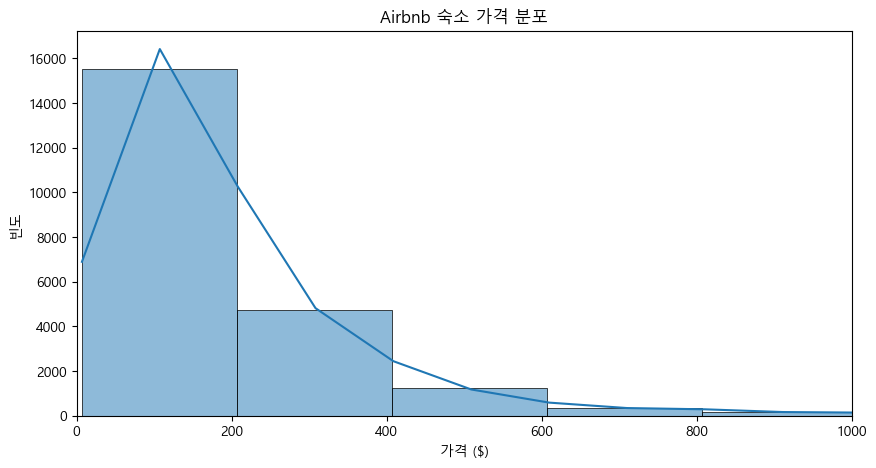

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df_selected['price'], bins=100, kde=True)
plt.xlim(0, 1000)  # 너무 큰 이상치를 제외한 구간 시각화
plt.title("Airbnb 숙소 가격 분포")
plt.xlabel("가격 ($)")
plt.ylabel("빈도")
plt.show()
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우용 한글 폰트
plt.rcParams['axes.unicode_minus'] = False

# 지역별 가격 분포 

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2384\3634256916.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


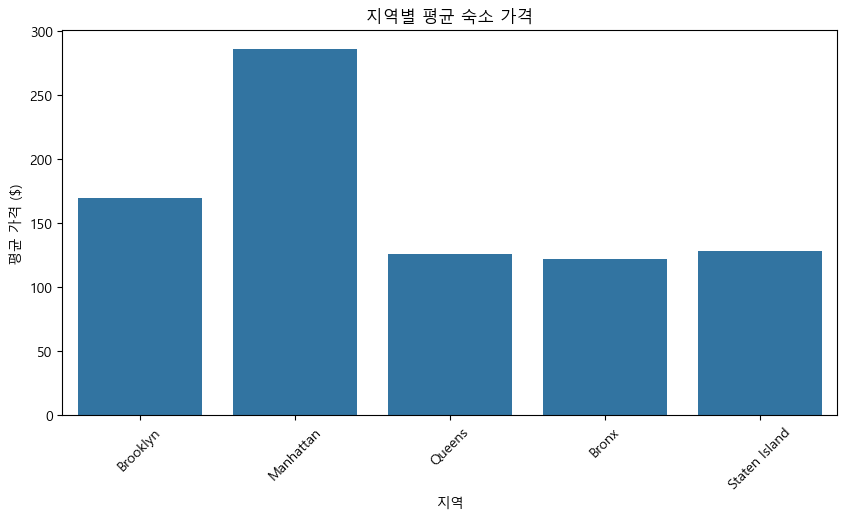

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=df_selected,
    x='neighbourhood_group_cleansed',
    y='price',
    estimator=np.mean,
    ci=None
)
plt.title("지역별 평균 숙소 가격")
plt.xlabel("지역")
plt.ylabel("평균 가격 ($)")
plt.xticks(rotation=45)
plt.show()
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우용 한글 폰트
plt.rcParams['axes.unicode_minus'] = False

# ✅ 3. 숙소 유형별 가격 비교 (room_type)

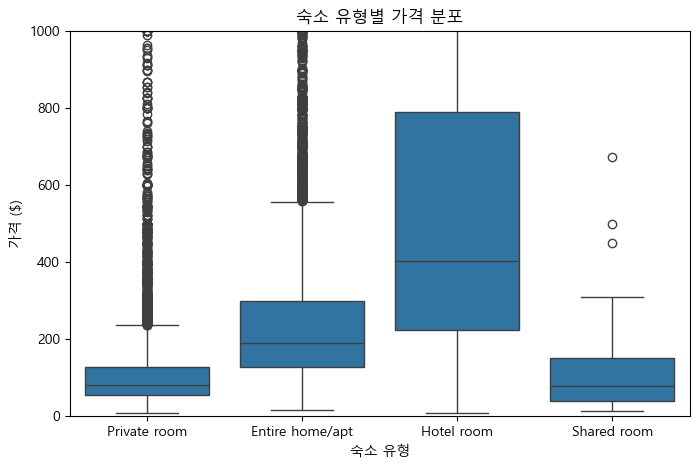

In [52]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_selected, x='room_type', y='price')
plt.ylim(0, 1000)
plt.title("숙소 유형별 가격 분포")
plt.xlabel("숙소 유형")
plt.ylabel("가격 ($)")
plt.show()
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우용 한글 폰트
plt.rcParams['axes.unicode_minus'] = False

# ✅ 4. 숙박 가능 인원 수 (accommodates) vs 가격


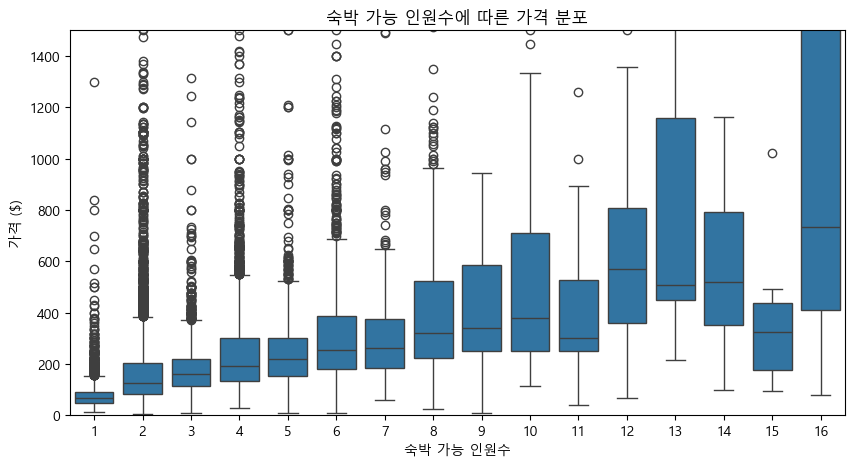

In [63]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_selected, x='accommodates', y='price')
plt.ylim(0, 1500)
plt.title("숙박 가능 인원수에 따른 가격 분포")
plt.xlabel("숙박 가능 인원수")
plt.ylabel("가격 ($)")
plt.show()

# ✅ 5. 리뷰 수 (number_of_reviews)와 가격의 관계

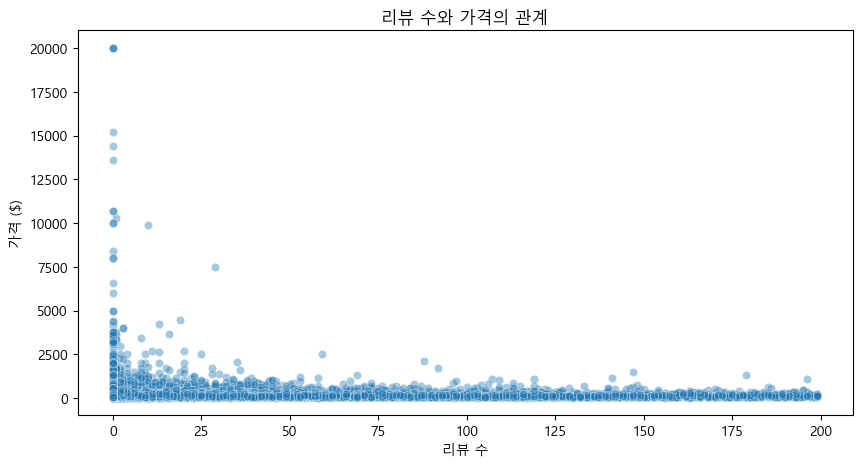

In [54]:
plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=df_selected[df_selected['number_of_reviews'] < 200],
    x='number_of_reviews',
    y='price',
    alpha=0.4
)
plt.title("리뷰 수와 가격의 관계")
plt.xlabel("리뷰 수")
plt.ylabel("가격 ($)")
plt.show()

# ✅ 6. 호스트 슈퍼호스트 여부에 따른 가격 차이


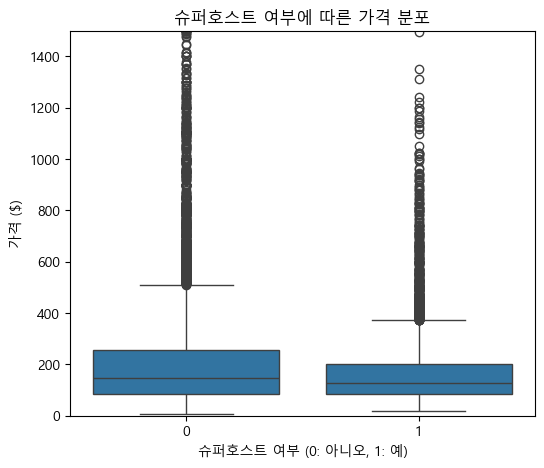

In [67]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df_selected, x='host_is_superhost', y='price')
plt.ylim(0, 1500)
plt.title("슈퍼호스트 여부에 따른 가격 분포")
plt.xlabel("슈퍼호스트 여부 (0: 아니오, 1: 예)")
plt.ylabel("가격 ($)")
plt.show()

# 추가 내용 

In [68]:
df['estimated_annual_income'] = df['price'] * df['availability_365']


In [71]:
bins = [0, 99, 299, 365]
labels = ['Occasional', 'Part-time', 'Full-time']
df['availability_type'] = pd.cut(df['availability_365'], bins=bins, labels=labels)


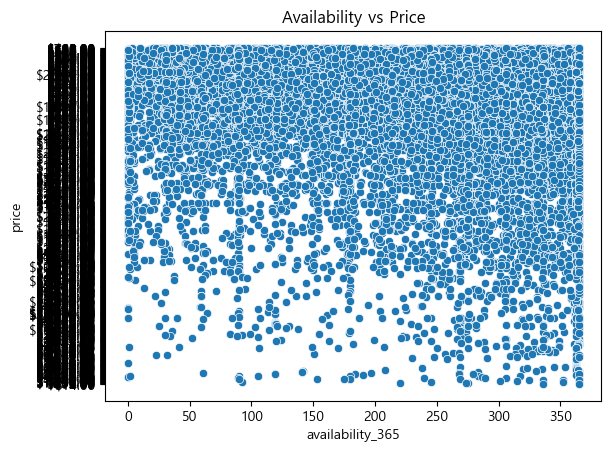

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='availability_365', y='price')
plt.title("Availability vs Price")
plt.show()


# ✅ 1. 데이터 준비 및 파생 변수 생성 코드

In [73]:
# 파생변수: 연매출 추정치 (단순 계산)
df['estimated_revenue'] = df['price'] * df['availability_365']

# 결측치 제거: 필요한 주요 컬럼만 고려
df_host = df[['host_is_superhost', 'host_total_listings_count',
              'number_of_reviews', 'reviews_per_month',
              'estimated_revenue']].dropna()

# 슈퍼호스트를 True/False → 1/0으로 인코딩
df_host['host_is_superhost'] = df_host['host_is_superhost'].map({'t': 1, 'f': 0})


# ✅ 2. 슈퍼호스트 vs 일반 호스트 비교

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x='host_is_superhost', y='estimated_revenue', data=df_host)
plt.xticks([0,1], ['일반 호스트', '슈퍼호스트'])
plt.title("슈퍼호스트 vs 일반 호스트의 연매출 분포")
plt.ylabel("예상 연매출 ($)")
plt.xlabel("호스트 유형")
plt.show()


KeyboardInterrupt: 

# ✅ 3. 호스트 보유 숙소 수 vs 연매출

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='host_total_listings_count', y='estimated_revenue', data=df_host, alpha=0.4)
plt.title("보유 숙소 수 vs 연매출")
plt.xlabel("호스트 보유 숙소 수")
plt.ylabel("예상 연매출 ($)")
plt.show()


# ✅ 4. 리뷰 수 vs 연매출 관계

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='number_of_reviews', y='estimated_revenue', data=df_host, alpha=0.4)
plt.title("리뷰 수 vs 연매출")
plt.xlabel("리뷰 수")
plt.ylabel("예상 연매출 ($)")
plt.show()

In [58]:
def decide_group_stat_test(
    df: pd.DataFrame,
    group_col: str,
    value_col: str,
    alpha: float = 0.05,
    max_shapiro_n: int = 5000,
    center: str = 'median',
    tablefmt: str = 'github',
    rng_seed: int = 0,
    small: float = 1e-3,
    verbose: bool = True,
):
    """
    Decide which group-comparison statistical test to use (ANOVA, Welch ANOVA,
    or Kruskal–Wallis) based on normality (Shapiro & D'Agostino K²) and
    homogeneity of variance (Levene).
    Parameters
    ----------
    df : DataFrame
    group_col : str
        Categorical grouping variable.
    value_col : str
        Numeric response variable (사전 변환: log 등 권장).
    alpha : float
        Significance level.
    max_shapiro_n : int
        Above this, Shapiro는 무작위 표본으로 실행.
    center : {'median','mean','trimmed'}
        Levene 옵션.
    tablefmt : str
        tabulate 출력 포맷.
    rng_seed : int
        재현 가능한 샘플링 시드.
    small : float
        이보다 작은 p는 과학적 표기 사용.
    verbose : bool
        True이면 콘솔 출력.
    Returns
    -------
    result : dict
        {
          'normal_tbl': DataFrame,
          'normality_sw': bool,
          'normality_k2': bool,
          'normality': bool,
          'levene_p': float or np.nan,
          'recommend': 'anova'|'welch'|'transform_or_nonparam'|'kruskal'
        }
    """
    # NA 제거 후 분석 대상 서브셋
    sub = df[[group_col, value_col]].dropna()
    groups = sub[group_col].unique()
    if verbose:
        print("\n=== 정규성, 등분산성 검정 ===")
    shapiro_ps, k2_ps, ns = [], [], []
    rng = np.random.default_rng(rng_seed)
    for g in groups:
        vals = sub.loc[sub[group_col] == g, value_col].values
        n = len(vals)
        ns.append(n)
        # --- Shapiro ---
        if n >= 3:
            if n <= max_shapiro_n:
                _, p_sw = stats.shapiro(vals)
            else:
                sample = rng.choice(vals, size=max_shapiro_n, replace=False)
                _, p_sw = stats.shapiro(sample)
        else:
            p_sw = np.nan
        shapiro_ps.append(p_sw)
        # --- D'Agostino K² ---
        if n >= 8:
            _, p_k2 = stats.normaltest(vals, nan_policy='omit')
        else:
            p_k2 = np.nan
        k2_ps.append(p_k2)
    # 결과 테이블
    normal_tbl = (
        pd.DataFrame({
            group_col: groups,
            'n': ns,
            'shapiro_p': shapiro_ps,
            'k2_p': k2_ps
        })
        .sort_values('n', ascending=False)
        .reset_index(drop=True)
    )
    # 판정
    valid_sw = normal_tbl['shapiro_p'].notna()
    normality_sw = (normal_tbl.loc[valid_sw, 'shapiro_p'] >= alpha).all() if valid_sw.any() else True
    valid_k2 = normal_tbl['k2_p'].notna()
    normality_k2 = (normal_tbl.loc[valid_k2, 'k2_p'] >= alpha).all() if valid_k2.any() else True
    normality = normality_sw and normality_k2
    # Levene (길이≥2 그룹만 사용)
    levene_groups = [sub.loc[sub[group_col] == g, value_col].values for g in groups]
    levene_groups = [arr for arr in levene_groups if len(arr) >= 2]
    if len(levene_groups) >= 2:
        _, le_p = stats.levene(*levene_groups, center=center)
    else:
        le_p = np.nan
    # 추천
    if normality and (not np.isnan(le_p)) and le_p >= alpha:
        recommend = 'anova'
    elif normality and (not np.isnan(le_p)) and le_p < alpha:
        recommend = 'welch'
    elif (not normality) and (not np.isnan(le_p)) and le_p >= alpha:
        recommend = 'transform_or_nonparam'
    else:
        # 정규성 위배 & 등분산성 위배 (또는 Levene 불가)
        recommend = 'kruskal'
    # 출력 포맷
    def fmt_p(x):
        if pd.isna(x):
            return "nan"
        return f"{x:.2e}" if x < small else f"{x:.4f}"
    if verbose:
        normal_tbl_disp = normal_tbl.copy()
        normal_tbl_disp['shapiro_p'] = normal_tbl_disp['shapiro_p'].apply(fmt_p)
        normal_tbl_disp['k2_p']      = normal_tbl_disp['k2_p'].apply(fmt_p)
        print("\n[그룹별 정규성 p-value]")
        print(tabulate(normal_tbl_disp, headers='keys', tablefmt=tablefmt, showindex=False))
        if np.isnan(le_p):
            print("\nLevene p-value = nan (그룹 수 부족 또는 표본 부족).")
        else:
            print(f"\nLevene p-value = {fmt_p(le_p)}")
        if recommend == 'anova':
            msg = '→ 고전 ANOVA 가능.'
        elif recommend == 'welch':
            msg = '→ Welch ANOVA 권장 (Games-Howell 사후).'
        elif recommend == 'transform_or_nonparam':
            msg = '→ 로그/Box-Cox 변환 후 모수검정 시도 또는 비모수(Kruskal).'
        else:
            msg = '→ Kruskal-Wallis + Dunn(보정) 권장.'
        print(msg)
    return {
        'normal_tbl': normal_tbl,
        'normality_sw': normality_sw,
        'normality_k2': normality_k2,
        'normality': normality,
        'levene_p': le_p,
        'recommend': recommend,
    }








In [59]:
# ---------------------------------------------------
# neighbourhood_group_cleansed과 price 간의 연관성 가설검정
# ---------------------------------------------------
alpha = 0.05
max_shapiro_n = 5000 # 이보다 크면 Shapiro 신뢰↓ -> 샘플 or skip
X = 'neighbourhood_group_cleansed'
y = 'log_price'
# 가설 수립
# h0 = 'neighbourhood_group_cleansed 그룹 간 가격 차이는 없을 것이다'
# h1 = '적어도 한 개 이상의 neighbourhood_group_cleansed 그룹 간 가격 차이가 있을 것이다'
print("=== 가설 검정 ===")
print(f"독립변수 X: {X}")
print(f"종속변수 y: {y}")
# print(f"귀무가설 H0: {h0}")
# print(f"대립가설 H1: {h1}")
res = decide_group_stat_test(df, X, y)
print(res['recommend'])
# ---------------------------------------------------
# neighbourhood_group_cleansed과 price 간의 연관성 가설검정
# ---------------------------------------------------
res = kruskal_dunn(
    df,
    X=X,
    Y=y,
    alpha=alpha,
    adjust='holm',   # 'bonf', 'holm', 'fdr'
    verbose=True
)
if res['pvals_matrix'] is not None:
    p_heatmap(
        res['pvals_matrix'],
        alpha=alpha,
        clip_upper=0.05,
        annot_mode="p",    # 숫자 표시
        cmap="rocket_r",      # 푸른 계열
        text_color="black",
    )

=== 가설 검정 ===
독립변수 X: neighbourhood_group_cleansed
종속변수 y: log_price


KeyError: "['log_price'] not in index"

In [57]:
# Kruskal–Wallis + Dunn 검정
def kruskal_dunn(
    df: pd.DataFrame,
    X: str,              # 그룹 컬럼명
    Y: str,              # 값 컬럼명
    alpha: float = 0.05,
    adjust: str = 'bonf',  # 'bonf','bonferroni','holm','fdr','fdr_bh'
    min_n: int = 2,      # 이 미만 표본인 그룹 제외
    tablefmt: str = 'psql',
    round_p: int = 4,
    verbose: bool = True,
):
    """
    간단 Kruskal–Wallis + Dunn(posthoc) 함수.
    df[X], df[Y] 결측 제거 후 그룹 자동 추출.
    다중비교 보정은 adjust로 선택.
    """
    # --- adjust 매핑 ---
    adj_map = {
        'bonf': 'bonferroni',
        'bonferroni': 'bonferroni',
        'holm': 'holm',
        'fdr': 'fdr_bh',
        'fdr_bh': 'fdr_bh',
    }
    p_adjust = adj_map.get(adjust.lower(), adjust)  # 미등록값은 그대로 전달
    # 결측 제거
    sub = df[[X, Y]].dropna().copy()
    # 그룹 자동 추출 & min_n 필터
    grp_sizes = sub.groupby(X)[Y].size()
    groups_used = grp_sizes[grp_sizes >= min_n].index.tolist()
    if verbose:
        dropped = grp_sizes[grp_sizes < min_n]
        print(f"\n=== Kruskal–Wallis: {Y} ~ {X} ===")
        print(f"사용 그룹: {len(groups_used)}개 (min_n={min_n})")
        if not dropped.empty:
            print(f"제외된 소표본 그룹({len(dropped)}): {', '.join(dropped.index.astype(str))}")
    # 데이터 배열 준비
    group_arrays = [sub.loc[sub[X] == g, Y].values for g in groups_used]
    # 귀무/대립가설 문자열
    h0 = f"H0: {X} 그룹 간 {Y} 분포(중앙위치)에 차이가 없다."
    h1 = f"H1: 적어도 한 {X} 그룹의 {Y} 분포가 다르다."
    # 그룹 2개 미만이면 KW 불가
    if len(group_arrays) < 2:
        if verbose:
            print("그룹 수 < 2 → Kruskal–Wallis 수행 불가.")
        return {
            'H': np.nan, 'p_kw': np.nan, 'kw_reject': None,
            'h0': h0, 'h1': h1,
            'groups_used': groups_used,
            'group_sizes': grp_sizes,
            'pvals_matrix': None,
            'sig_pairs': None,
            'nonsig_pairs': None,
        }
    # Kruskal–Wallis
    H, p_kw = stats.kruskal(*group_arrays)
    kw_reject = bool(p_kw < alpha)
    if verbose:
        print(f"Kruskal–Wallis H = {H:.4f}, p-value = {p_kw:.4g}")
        print(h0)
        print(h1)
    if not kw_reject:
        if verbose:
            print(f"p-value ≥ {alpha} → 귀무가설 채택. 사후검정 생략.")
        return {
            'H': H, 'p_kw': p_kw, 'kw_reject': kw_reject,
            'h0': h0, 'h1': h1,
            'groups_used': groups_used,
            'group_sizes': grp_sizes,
            'pvals_matrix': None,
            'sig_pairs': None,
            'nonsig_pairs': None,
        }
    # Dunn 사후검정
    if verbose:
        print(f"p-value < {alpha} → 귀무가설 기각. Dunn 사후({p_adjust}) 진행.\n")
        print(f"=== Dunn 다중비교 ({p_adjust} 보정) ===")
    pvals = sp.posthoc_dunn(
        sub.loc[sub[X].isin(groups_used), :],
        val_col=Y,
        group_col=X,
        p_adjust=p_adjust
    )
    # 사용 그룹 순서대로 정렬
    pvals = pvals.reindex(index=groups_used, columns=groups_used)
    if verbose:
        print(tabulate(pvals.round(round_p), headers='keys', tablefmt=tablefmt,
                       showindex=True, floatfmt=f".{round_p}f"))
    # 유의/비유의 쌍 나누기
    sig, nonsig = [], []
    for g1, g2 in combinations(groups_used, 2):
        p_ = pvals.loc[g1, g2]
        (sig if p_ < alpha else nonsig).append((g1, g2, p_))
    sig_df = pd.DataFrame(sig, columns=['Group1', 'Group2', 'p-value'])
    nonsig_df = pd.DataFrame(nonsig, columns=['Group1', 'Group2', 'p-value'])
    if verbose:
        print(f"\n=== 유의한 그룹 쌍 (p < {alpha}) ===")
        if sig_df.empty:
            print("(없음)")
        else:
            print(tabulate(sig_df.round(round_p), headers='keys', tablefmt=tablefmt,
                           showindex=False, floatfmt=f".{round_p}f"))
        print(f"\n=== 유의하지 않은 그룹 쌍 (p ≥ {alpha}) ===")
        if nonsig_df.empty:
            print("(없음)")
        else:
            print(tabulate(nonsig_df.round(round_p), headers='keys', tablefmt=tablefmt,
                           showindex=False, floatfmt=f".{round_p}f"))
    return {
        'H': H,
        'p_kw': p_kw,
        'kw_reject': kw_reject,
        'h0': h0,
        'h1': h1,
        'groups_used': groups_used,
        'group_sizes': grp_sizes,
        'pvals_matrix': pvals,
        'sig_pairs': sig_df,
        'nonsig_pairs': nonsig_df,
    }

def p_heatmap(
    pmat: pd.DataFrame,
    alpha: float = 0.05,
    clip_upper: float | None = 0.05,     # 색상 범위를 0~clip_upper로 제한 (기본=0.05)
    annot_mode: str = "stars",           # "stars" | "p" | "logp" | "none"
    lower_triangle_only: bool = True,
    cmap: str | None = None,             # 예: "rocket_r", "mako", "viridis_r"
    figsize: tuple | None = None,
    star_levels: tuple = (0.001, 0.01, 0.05),  # (***) (**) (*) cutoffs
    text_color: str = "black",
    font_size: int = 8,
    cbar: bool = True,
):
    """
    예쁜 Seaborn 히트맵으로 posthoc p-value 시각화.
    Parameters
    ----------
    pmat : DataFrame
        대칭 p-value 행렬.
    alpha : float
        유의수준 (색상 해석/legend 참고용).
    clip_upper : float or None
        색 스케일 상한. None이면 pmat max 사용.
        상한을 alpha(또는 0.05) 근처로 두면 유의/비유의 대비가 잘 보임.
    annot_mode : {"stars","p","logp","none"}
        셀 텍스트 표시 방식.
    lower_triangle_only : bool
        True면 상삼각 마스크 → 중복 제거.
    cmap : str or None
        팔레트. None이면 'rocket_r' 사용 (작은 p 진한 핑크/보라 계열).
    figsize : tuple or None
        자동 크기 선택.
    star_levels : tuple
        (p<0.001, p<0.01, p<0.05) 같은 cutoffs. annot_mode="stars"에서 사용.
    text_color : str
        주석 텍스트 색.
    font_size : int
        주석 폰트 크기.
    cbar : bool
        컬러바 표시 여부.
    Returns
    -------
    fig, ax
    """
    P = pmat.astype(float).copy()
    # 대각선 비교 없음
    np.fill_diagonal(P.values, np.nan)
    # 마스크
    mask = None
    if lower_triangle_only:
        mask = np.triu(np.ones_like(P, dtype=bool), k=0)  # diag 포함 상삼각 가리기
    # 색상 스케일 데이터
    plot_vals = P.copy()
    if clip_upper is not None:
        plot_vals = plot_vals.clip(upper=clip_upper)
    # 팔레트
    if cmap is None:
        cmap = "rocket_r"  # 작은 p가 진하게
    # Figure 크기 자동
    if figsize is None:
        n = P.shape[0]
        figsize = (max(5, n * 0.55), max(4, n * 0.55))
    # annot 데이터 생성
    if annot_mode == "none":
        annot = False
    else:
        annot_arr = np.empty_like(P, dtype=object)
        annot_arr[:] = ""
        for i in range(P.shape[0]):
            for j in range(P.shape[1]):
                if lower_triangle_only and j >= i:
                    continue
                p = P.iat[i, j]
                if np.isnan(p):
                    continue
                if annot_mode == "p":
                    # 3자리 반올림, 아주 작으면 <0.001 표시
                    annot_arr[i, j] = "<0.001" if p < 0.001 else f"{p:.3f}"
                elif annot_mode == "logp":
                    annot_arr[i, j] = f"{-np.log10(max(p, 1e-300)):.2f}"
                elif annot_mode == "stars":
                    # 별표 등급
                    if p < star_levels[0]:
                        annot_arr[i, j] = "***"
                    elif p < star_levels[1]:
                        annot_arr[i, j] = "**"
                    elif p < star_levels[2]:
                        annot_arr[i, j] = "*"
                    else:
                        annot_arr[i, j] = "ns"
                else:
                    annot_arr[i, j] = ""
        annot = annot_arr
    # ---- plot ----
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(
        plot_vals,
        mask=mask,
        cmap=cmap,
        annot=annot,
        fmt="",
        annot_kws={"color": text_color, "fontsize": font_size},
        cbar=cbar,
        vmin=0,
        vmax=clip_upper if clip_upper is not None else None,
        cbar_kws={'label': f"p-value (clipped @ {clip_upper})" if clip_upper else "p-value"},
        linewidths=0.5,
        linecolor='white',
        square=False,
        ax=ax
    )
    ax.set_title("Posthoc p-value Heatmap", pad=12)
    ax.set_xlabel("")
    ax.set_ylabel("")
    plt.tight_layout()
    return fig, ax